In [43]:
# Make the comparisons between
# segment
# 1 and 2
# 2 and 3
# 2 and 6

In [47]:
import pandas as pd

In [48]:
l2D = pd.read_csv('ecg2D.csv', header=None)
l2D.shape

(1440, 3)

In [49]:
singnal = l2D[1].values

In [50]:
from scipy import stats
stats.describe(singnal)

DescribeResult(nobs=1440, minmax=(-0.17999999999999994, 3.465), mean=0.7037604166666667, variance=0.1685727326919736, skewness=2.6670013831972192, kurtosis=10.329063878870878)

In [51]:
from scipy.signal import find_peaks as findPeaks
(allPks,_) = findPeaks(singnal,prominence=1)


Text(0.5, 1.0, 'Signal ')

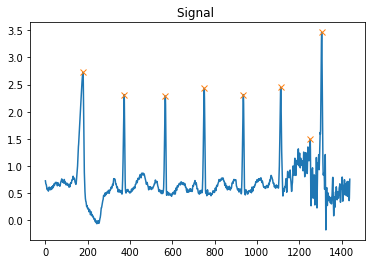

In [52]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(singnal)
plt.plot(allPks,singnal[allPks],'x')
plt.title('Signal ')

In [53]:
def extractECG(ecg,pks,offset=15):
    ecgSegms = []
    count = 0
    i = len(pks)
    while count < len(pks)-1:
        ecgSegm = ecg[allPks[count] - offset : allPks[count+1] - offset]
        count = count + 1
        ecgSegms.append(ecgSegm)
    print(len(ecgSegms))
    return ecgSegms

In [54]:
segms = extractECG(singnal,allPks)

7


In [55]:
def calDists(x, y):
    dists = np.zeros((len(y),len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            dists[i,j] = (y[i]-x[j])**2
    return dists

def DTWOptPath(x, y, acuCost):
    i = len(y)-1
    j = len(x)-1
    path = [[j,i]]
    while (i > 0) and (j > 0):
        if i==0:
            j = j-1
        elif j==0:
            i = i-1
        else:
            if acuCost[i-1,j] == min(acuCost[i-1,j-1],
                acuCost[i-1,j],
                acuCost[i,j-1]):
                i = i-1
            elif acuCost[i,j-1] == min(acuCost[i-1,j-1],
                acuCost[i-1,j],
                acuCost[i,j-1]):
                j = j-1
            else:
                i = i-1
                j = j-1
        path.append([j,i])
    path.append([0,0])
    return path

def pltDistances(dists,xlab="segment 1",ylab="segment 2",clrmap="viridis"):
    imgplt = plt.figure()
    plt.imshow(dists,
    interpolation='nearest',
    cmap=clrmap)
    plt.gca().invert_yaxis()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()
    plt.colorbar()
    
def computeCostMatrix(dists):
    acuCost = np.zeros(dists.shape)
    acuCost[0,0]= dists[0,0]
    for j in range(1,dists.shape[1]):
        acuCost[0,j] = dists[0,j]+acuCost[0,j-1]
    for i in range(1,dists.shape[0]):
        acuCost[i,0] = dists[i,0]+acuCost[i-1,0]
    for i in range(1,dists.shape[0]):
        for j in range(1,dists.shape[1]):
            acuCost[i,j] = min(acuCost[i-1,j-1],
            acuCost[i-1,j],
            acuCost[i,j-1])+dists[i,j]
    return acuCost

def pltCostAndPath(acuCost,path,xlab="X",ylab="Y",clrmap="viridis"):
    px = [pt[0] for pt in path]
    py = [pt[1] for pt in path]
    imgplt = pltDistances(acuCost,
    xlab=xlab,
    ylab=ylab,
    clrmap=clrmap)
    plt.plot(px,py)
    
def pltWarp(s1,s2,path,xlab="idx",ylab="Value"):
    imgplt = plt.figure()
    for [idx1,idx2] in path:
        plt.plot([idx1,idx2],[s1[idx1],s2[idx2]],color="C4",linewidth=2)
    plt.plot(s1,'o-',color="C0",markersize=3)
    plt.plot(s2,'s-',color="C1",markersize=2)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

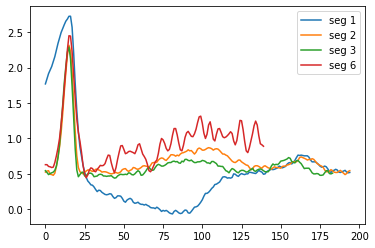

In [64]:
segment1 = segms[0]
segment2 = segms[1]
segment3 = segms[2]
segment6 = segms[5]
plt.plot(segment1, label='seg 1')
plt.plot(segment2, label='seg 2')
plt.plot(segment3, label='seg 3')
plt.plot(segment6, label='seg 6')
plt.legend()

In [66]:
def plot_dist(x, y, x_label, y_label):
    dists = calDists(x, y)
    costMatrix = computeCostMatrix(dists)
    path = DTWOptPath(x, y, costMatrix)

    pltDistances(dists, xlab=x_label,ylab=y_label, clrmap="Reds")
    pltCostAndPath(costMatrix,path,xlab=x_label,ylab=y_label, clrmap='Reds')
    pltWarp(x,y,path)

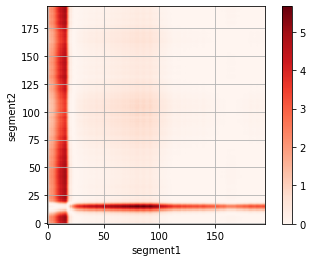

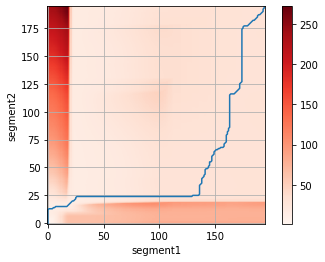

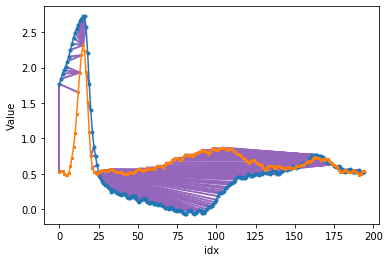

In [68]:
plot_dist(segment1, segment2, 'segment1', 'segment2')

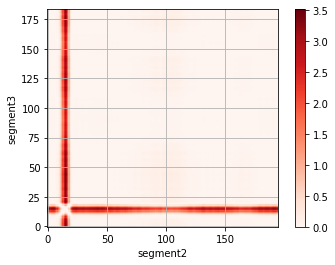

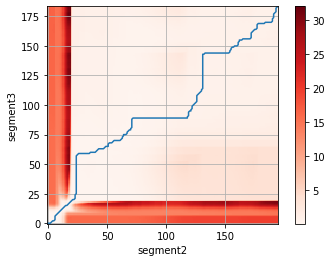

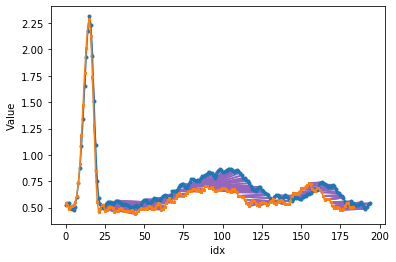

In [69]:
plot_dist(segment2, segment3, 'segment2', 'segment3')

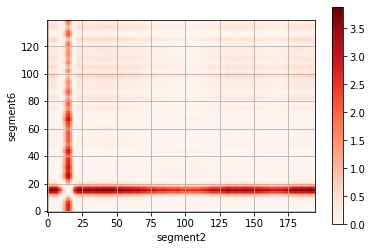

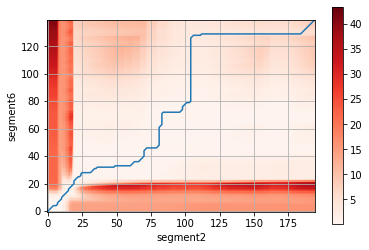

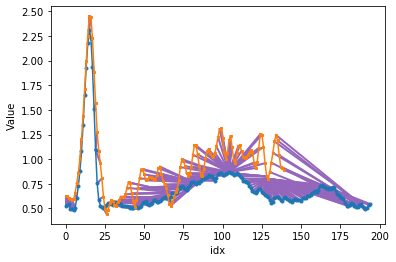

In [70]:
plot_dist(segment2, segment6, 'segment2', 'segment6')